# Project 2 (pre-processing, error checking)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset file into the Jupyter-lab enviroment
data = pd.read_csv("D:/IMT/3- Data Science/9- Project #2/Market.csv")
# For Kaggle:
#data = pd.read_csv('../input/marketing-data/Market.csv')

# making the dataset 2D with the help of converting it to DataFrame
df = pd.DataFrame(data)
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,5/27/2021,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,5/28/2021,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,5/31/2021,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,6/1/2021,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [3]:
print(f'Unique values in Index columns: \n{df.Index.unique()}')

Unique values in Index columns: 
['NYA' 'IXIC' 'HSI' '000001.SS' 'GSPTSE' '399001.SZ' 'NSEI' 'GDAXI' 'KS11'
 'SSMI' 'TWII' 'J203.JO' 'N225' 'N100']


## 1) Considering only the "NYA" indexes from the "Index" column

In [4]:
# finding the indexes that we want and saving it in "df1", we only want to work with the "NYA"s
df1 = df[df["Index"] == "NYA"]
df1

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,5/25/2021,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,5/26/2021,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,5/27/2021,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


**To get sure of having only the "NYA" in the "Index" column.**

In [5]:
# checking the first 5 rows
df1.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [6]:
# checking the last 5 rows
df1.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13943,NYA,5/24/2021,16375.00000,16508.51953,16375.00000,16464.68945,16464.68945,2.947400e+09
13944,NYA,5/25/2021,16464.68945,16525.81055,16375.15039,16390.18945,16390.18945,3.420870e+09
13945,NYA,5/26/2021,16390.18945,16466.33984,16388.32031,16451.96094,16451.96094,3.674490e+09
13946,NYA,5/27/2021,16451.96094,16546.35938,16451.96094,16531.94922,16531.94922,5.201110e+09
13947,NYA,5/28/2021,16531.94922,16588.68945,16531.94922,16555.66016,16555.66016,4.199270e+09


So, as it can be seen, there is only "NYA" in the DataFrame.

## 2) We don't need this "Volume" column, so we remove it.

In [7]:
# this is deleting the "Volume" column
df2 = df1.drop(columns = "Volume")
df2

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450
13944,NYA,5/25/2021,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450
13945,NYA,5/26/2021,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940
13946,NYA,5/27/2021,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220


## 3) Removing the decimal part of the data points

In [8]:
# this is removing the decimal part of the numbers/data points
# keeping the data format and not changing it, but only rounding up/down each number
df3 = round(df2)
df3

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


## 4) Let's SORT the DataFrame based on the "Date" column.

In [9]:
# first converting the type of the "Date" column to date time
#df3['Date'] = pd.to_datetime(df3.Date)

# and then sorting it with this command
#df3.sort_values('Date').set_index('Date')
#df3

In [10]:
# OR instead of the above cell;

# sorting the DataFrame with the reference of the "Date" column.
# it will be usefull in the future, when we want to eliminate Noises!

df3.sort_values(by = ["Date"])
df3

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


## 5) Error checking: "Noise" & "Missing Value"

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13948 entries, 0 to 13947
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13946 non-null  float64
 4   Low        13945 non-null  float64
 5   Close      13944 non-null  float64
 6   Adj Close  13938 non-null  float64
dtypes: float64(5), object(2)
memory usage: 871.8+ KB


In [12]:
df3.describe(include='all')

,Index,Date,Open,High,Low,Close,Adj Close
count,13948,13948,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000
unique,1,13948,NaN,NaN,NaN,NaN,NaN
top,NYA,12/31/1965,NaN,NaN,NaN,NaN,NaN
freq,13948,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4452.144834,4469.313495,4434.260739,4453.026033,4455.093916
std,NaN,NaN,4074.832916,4094.959937,4052.814928,4075.484621,4075.457549
min,NaN,NaN,348.000000,348.000000,348.000000,348.000000,348.000000
25%,NaN,NaN,655.000000,655.000000,655.000000,655.000000,656.000000
50%,NaN,NaN,2632.000000,2632.000000,2632.000000,2632.000000,2633.000000
75%,NaN,NaN,7339.500000,7376.500000,7278.000000,7339.750000,7342.750000


In [13]:
# with "describe()" we can check out the "count" row and see if there is any Missing Value
df3.describe()

#np.mean(df3['Column Name'])
#np.min(df3['Column Name'])
#np.max(df3['Column Name'])

,Open,High,Low,Close,Adj Close
count,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000
mean,4452.144834,4469.313495,4434.260739,4453.026033,4455.093916
std,4074.832916,4094.959937,4052.814928,4075.484621,4075.457549
min,348.000000,348.000000,348.000000,348.000000,348.000000
25%,655.000000,655.000000,655.000000,655.000000,656.000000
50%,2632.000000,2632.000000,2632.000000,2632.000000,2633.000000
75%,7339.500000,7376.500000,7278.000000,7339.750000,7342.750000
max,16590.000000,16686.000000,16532.000000,16590.000000,16590.000000


There is 1 MV in the "Open": (Toppest numeber - 13947 = 1) <br>
There are 2 MV's in the "High": (13948 - 13946 = 2) <br>
There are 3 MV's in the "Low": (13948 - 13945 = 3) <br>
There are 4 MV's in the "Close": (13948 - 13944 = 4) <br>
There are 10 MV's in the "Adj Close": (13948 - 13938 = 10)

In [14]:
# here is the "describe()" command for the non-numeric columns
df3.describe(include=object)

,Index,Date
count,13948,13948
unique,1,13948
top,NYA,12/31/1965
freq,13948,1


**How many NaN do we have in our DataFrame?**

This command in below tells us how many Missing Values are there in each column (no matter numeric column or non-numeric column. <br>
So, this command is more usefull than "describe()", it is briefly and more usefull.

In [15]:
# sum of null values in each columns of our DataFrame, can be shown as:
df3.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
dtype: int64

In [16]:
# also this command can be used
df3.isna().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
dtype: int64

So, now let's check out the null indexes and see them

In [17]:
df3[df3['Open'].isna()]

,Index,Date,Open,High,Low,Close,Adj Close
289,NYA,2/23/1967,NaN,NaN,NaN,NaN,NaN


In [18]:
df3[df3['High'].isna()]

,Index,Date,Open,High,Low,Close,Adj Close
190,NYA,9/30/1966,437.0,NaN,437.0,437.0,437.0
289,NYA,2/23/1967,NaN,NaN,NaN,NaN,NaN


In [19]:
df3[df3['Low'].isna()]

,Index,Date,Open,High,Low,Close,Adj Close
102,NYA,5/26/1966,497.0,497.0,NaN,497.0,497.0
231,NYA,11/30/1966,461.0,461.0,NaN,461.0,461.0
289,NYA,2/23/1967,NaN,NaN,NaN,NaN,NaN


In [20]:
df3[df3['Close'].isna()]

,Index,Date,Open,High,Low,Close,Adj Close
104,NYA,5/31/1966,492.0,492.0,492.0,NaN,492.0
170,NYA,9/1/1966,443.0,443.0,443.0,NaN,443.0
289,NYA,2/23/1967,NaN,NaN,NaN,NaN,NaN
464,NYA,11/1/1967,544.0,544.0,544.0,NaN,544.0


In [21]:
df3[df3['Adj Close'].isna()]

,Index,Date,Open,High,Low,Close,Adj Close
154,NYA,8/10/1966,477.0,477.0,477.0,477.0,NaN
257,NYA,1/9/1967,477.0,477.0,477.0,477.0,NaN
282,NYA,2/13/1967,507.0,507.0,507.0,507.0,NaN
289,NYA,2/23/1967,NaN,NaN,NaN,NaN,NaN
307,NYA,3/21/1967,521.0,521.0,521.0,521.0,NaN
333,NYA,4/27/1967,544.0,544.0,544.0,544.0,NaN
353,NYA,5/25/1967,532.0,532.0,532.0,532.0,NaN
635,NYA,7/19/1968,598.0,598.0,598.0,598.0,NaN
700,NYA,11/12/1968,623.0,623.0,623.0,623.0,NaN
800,NYA,4/16/1969,595.0,595.0,595.0,595.0,NaN


As you have seen in these several tables, row 289 was a common row among all the Missing Values, and since this row has no value in any Feature, we will delete it.

In [22]:
# we use this index of 289 from the table below,
# which was the only one and we got it earlier
nan_id = df3[df3['Open'].isna()].index

#nan_id = 289

In [23]:
# now we drop 289th row from data which is saved in "nan_id", because it does not contain any known data and it is all NaN:
df3_1 = df3.drop(nan_id)
df3_1

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


***
***
***

## 6) Fillna or dropna ?

- ***WE CAN FILL MISSING VALUES OF THE DATAFRAME (this section of the notebook)*** : fillna() <br>
- ***OR, WE CAN LEAVE THEM EMPTY AND DELETE THE ROWS WHICH HAVE NaN VALUES (next part of the notebook)*** : dropna() <br> 

### 6-1) fillna()

In [24]:
# filling in missing values
df3_2 = df3_1.fillna(method='ffill', axis=1)
df3_2

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


In [25]:
# LET'S CHECK THIS OUT AGAIN:
# sum of null values in each columns of our DataFrame,
# can be shown as:
df3_2.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

As you can see, there is no Missing Value left, they're all filled!

In [26]:
# and also check this:
df3_2.isna().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In this notebook I've decided not to use df3_2 and use the next part's DataFrame which is df4 and going further with that.

***

### 6-2) dropna()

***OR IN THE CASE OF NOT FIILING UP THE MISSING VALUES (leaving it), WE DO:***

**In summary;**<br>
**We have to, first, check for the Noise in the DataFrame.**<br>
- If we can plot 2 desired columns, then, there is no problem with their dimension (X, Y) (plot it).<br>
- If we can not plot them, there IS a problem with their dimension (X, Y) (do some works first).<br>

**Just as a quick check, we check the whole DataFrame for amount of Missing Values.**<br>
- If there are (a lot) MVs, we take every feature (X= x1, x2, x3, x4, ...) with the target (Y), we put them in a separate DataFrame, then we drop the MVs of these two separate columns together, and at last we plot them (the new DataFrame of this 2 desired columns) and then check for the Noise visually!<br>
- If there is (just a few) MV, we drop the MVs of the whole DataFrame at the same time (consider the whole DataFrame at once, like what we did in "df4"), then we only plot each feature (X= x1 or x2 or x3 or x4 or ...) and target (Y) together (one by one, without making any new Dataframes) and then check out for the Noises inside them visually.<br>

***In this DataFrame that we are analysing,*** we have 13948 rows and in total we have about 20 Missing Values.<br>
So, this is "a few" Missing Value and "not a lot".<br>
( 20 / 13948 ) * 100 = 0.14 %<br>
As the amount of Missing Values in this DataFrame is less than a percent (0.14%), we consider it a few, and we drop Missing Values of the "whole DataFrame" and not the 2 columns at each time. <br>
(WE DON'T DO: Feature, Target = New_DataFrame => drop this way)

In [27]:
# in here we implement "dropna()" for the whole DataFrame of us
df4 = df3_1.dropna()
df4

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


In [28]:
df3_1.shape

(13947, 7)

In [29]:
df4.shape

(13932, 7)

How many Missing Values had been removed?<br>
At first it was 13948 and then we removed the (nan_id = 289), so (13948 - 1 = 13947)<br>
13947 - 13932 = 15<br>
It is even less than the 20's that we assumed.
Because maybe 4 Missing Values had some overlaps in rows with each other!

## 7) Histogram

**Now that we have our DataFrame ready, let's plot the histograms of each feature:**

The "Date" column didn't give us a describable plot.

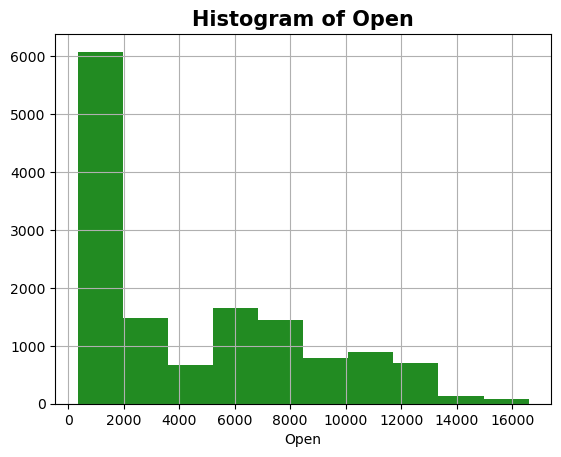

In [30]:
# plotting the "Histogram of Open"

plt.hist(df4['Open'], color='forestgreen')

plt.title ('Histogram of Open', fontsize=15, fontweight='bold')

plt.xlabel('Open', fontsize=10)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Features histogram/Open.png')

plt.show()

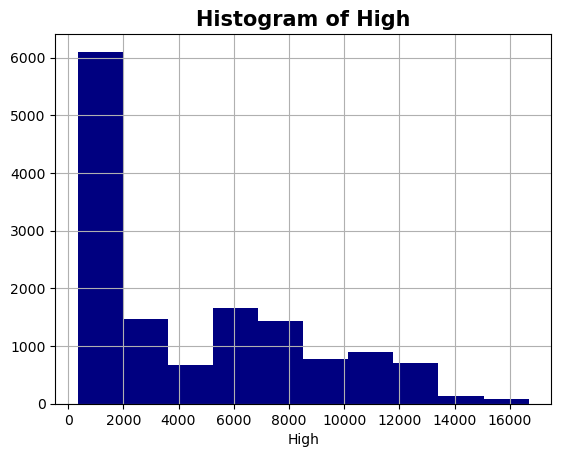

In [31]:
# plotting the "Histogram of High"

plt.hist(df4['High'], color='navy')

plt.title ('Histogram of High', fontsize=15, fontweight='bold')

plt.xlabel('High', fontsize=10)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Features histogram/High.png')

plt.show()

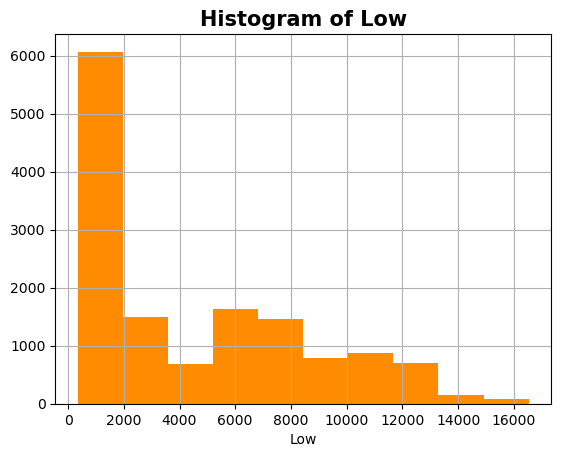

In [32]:
# plotting the "Histogram of Low"

plt.hist(df4['Low'], color='darkorange')

plt.title ('Histogram of Low', fontsize=15, fontweight='bold')

plt.xlabel('Low', fontsize=10)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Features histogram/Low.png')

plt.show()

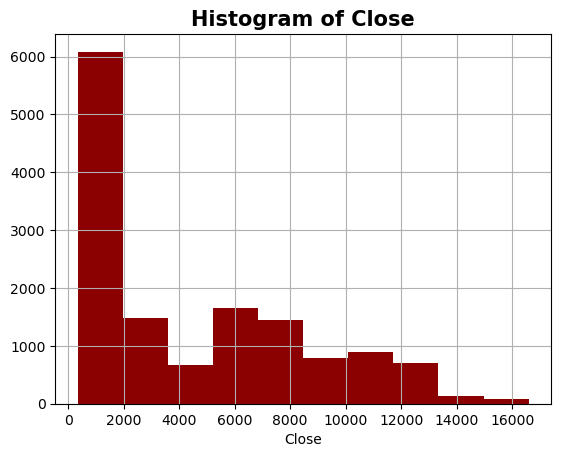

In [33]:
# plotting the "Histogram of Close"

plt.hist(df4['Close'], color='darkred')

plt.title ('Histogram of Close', fontsize=15, fontweight='bold')

plt.xlabel('Close', fontsize=10)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Features histogram/Close.png')

plt.show()

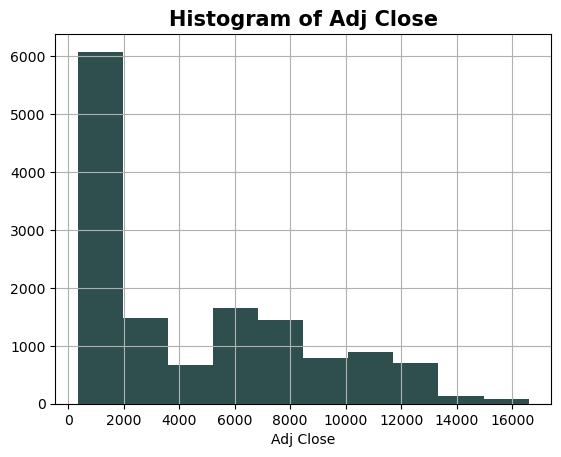

In [34]:
# plotting the "Histogram of Adj Close"

plt.hist(df4['Adj Close'], color='darkslategray')

plt.title ('Histogram of Adj Close', fontsize=15, fontweight='bold')

plt.xlabel('Adj Close', fontsize=10)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Features histogram/Adj.png')

plt.show()

***
***

**Here is a small talk about *"dropna()"* vs. *"drop()"*** <br>

**Pandas** *DataFrame.dropna()*<br>
- If csv file has null values then they are displayed as NaN in Data Frame.<br>
    The Pandas *dropna()* method allows the user to analyze and drop Rows/Columns with Null values in different ways.<br>
    *DataFrameName.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)*<br>

**Pandas** *DataFrame.drop()*<br>
- Pandas provide *drop()* method to remove rows by using index label or column name.<br>
    This method is used to drop rows that do not satisfy the given conditions.<br>
    This helps data analysts to delete and filter Data Frame.<br>
    *DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise)*

***
***
***

## 8) Removing Noise of every two desired columns of Feature & Target, one by one:

> 1- Open vs. Adj Close <br>
> 2- High vs. Adj Close <br>
> 3- Low vs. Adj Close <br>
> 4- Close vs. Adj Close <br>
> 5- Index vs. Adj Close <br>
> 6- Date vs. Adj Close

Now for visually checking of Noises, we plot using Scatter Plot and here we just as a sample consider these two columns of our DataFrame:<br>
As you can see, we get no error, that's because of the dropna() that we implemented before!

### 8-1) Noise detection and removal of (( "Open" (Feature, x3) *vs.* "Adj Close" (Target, Y) ))

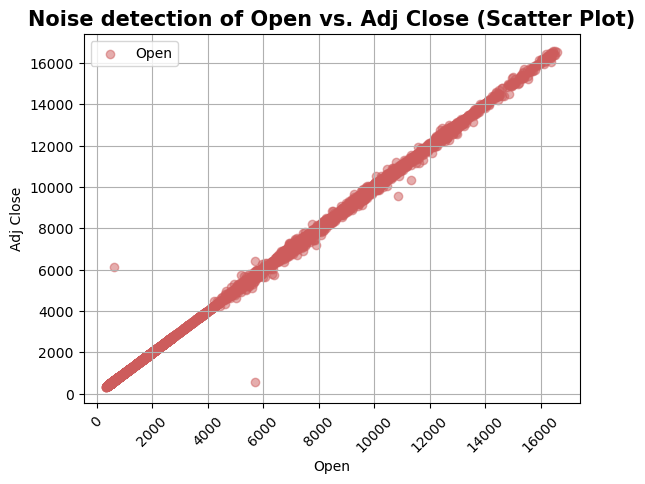

In [35]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df4, x='Open', y='Adj Close')
plt.scatter(df4['Open'], df4['Adj Close'], c='indianred', alpha=0.5)

plt.legend(['Open'], loc = 'best')
plt.title('Noise detection of Open vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Open', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ('D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Open_Adj_noisy.png')

plt.show()

You can see there are two Noises in the plot and these two are in the position that can't be solved liked before. <br>
These two Noises are somehow in the middle of the plot and they are not in the corners that can be eliminated by a single condition as before. <br>
A Single Condition (of greater /or smaller) can not handle these positions of Noises by itselfs. <br>
We have to implement a Binary condition (greater and smaller) for this problem. <br>
(( Remember that the "sort()" command is going to be so usefull now! ))
(Actually we implemented that for this situation!) <br>
Sort command made all the indexes of the Date column to be in order from the past time till nowadays!

**In the Binary Condition Mode:**

**For example:**<br>
For the top left Noise, here is the address:<br>
- On the y axis its position is above 5000,<br>
- On the x axis its position is under 2000.<br>

**Maybe like this:**<br>
Adj Close > 5000 and (and) Open < 2000<br>

**There is only ONE point who has this position in the plot!**<br>
AND THAT IS OUR NOISE! LET'S CHECK IT OUT!!!

In [36]:
# implementing the address to find out the noise index => result: The index is 831
Noise_up = df4[ (df4["Adj Close"]>5000) & (df4["Open"]<2000) ]
Noise_up

,Index,Date,Open,High,Low,Close,Adj Close
831,NYA,5/29/1969,612.0,612.0,612.0,612.0,6111.0


In [37]:
# implementing the address to find out the other noise index => result: The index is 852
Noise_down = df4[ (df4["Adj Close"]<1500) & (df4["Open"]>5000) ] # (df4["Adj Close"]<2000)
Noise_down

,Index,Date,Open,High,Low,Close,Adj Close
852,NYA,6/30/1969,5722.0,572.0,572.0,572.0,572.0


Now that I have these two indexes, I can remove these two noises by drop() command.<br>
But before that, let's see what will happen if we use the Single Condition instead of the Binary Condition?!

**In Single Condition mode:**<br>
Because of the .sort() that we implemented before, if we tell a value (not two value at the same time like the Binary Condition < and > | > and <), then we get a table, that the first value/row, is the index of the noise that we are looking for!

In [38]:
# implementing the Single Condition mode to achieve the first row which is the specification af the desired Noise
Noise_up_2 = df4[(df4["Adj Close"]>5000)]
Noise_up_2

,Index,Date,Open,High,Low,Close,Adj Close
831,NYA,5/29/1969,612.0,612.0,612.0,612.0,6111.0
7932,NYA,7/3/1997,5051.0,5051.0,5051.0,5051.0,5051.0
7933,NYA,7/7/1997,5028.0,5028.0,5028.0,5028.0,5028.0
7934,NYA,7/8/1997,5059.0,5059.0,5059.0,5059.0,5059.0
7935,NYA,7/9/1997,5002.0,5002.0,5002.0,5002.0,5002.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


In [39]:
# implementing the Single Condition mode to achieve the first row which is the specification af the other desired Noise
Noise_down_2 = df4[(df4["Open"]>5000)]
Noise_down_2

,Index,Date,Open,High,Low,Close,Adj Close
852,NYA,6/30/1969,5722.0,572.0,572.0,572.0,572.0
7932,NYA,7/3/1997,5051.0,5051.0,5051.0,5051.0,5051.0
7933,NYA,7/7/1997,5028.0,5028.0,5028.0,5028.0,5028.0
7934,NYA,7/8/1997,5059.0,5059.0,5059.0,5059.0,5059.0
7935,NYA,7/9/1997,5002.0,5002.0,5002.0,5002.0,5002.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


**Now is the time to remove these two achieved indexes! Using .drop()**<br>
**INDEXES are 831 & 852**

In [40]:
df5 = df4.drop(index = [831, 852])
df5

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


**Now let's check the plot again to see if the noises are gone?!**

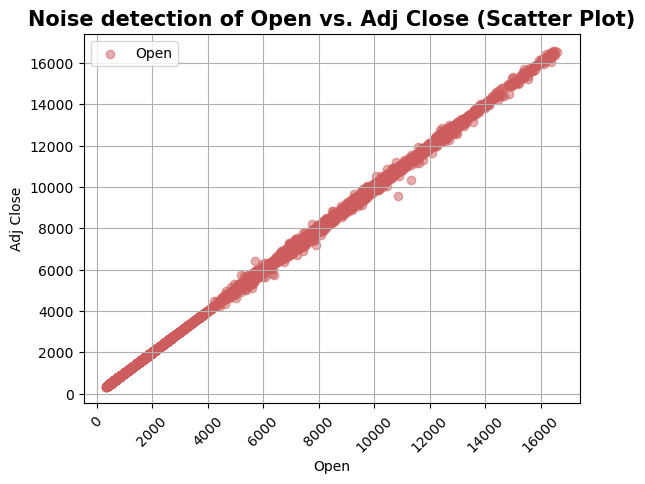

In [41]:
# plotting the "Scatter Plot" after Noise removing

#sns.scatterplot(data=df5, x='Open', y='Adj Close')
plt.scatter(df5['Open'], df5['Adj Close'], c='indianred', alpha=0.5)

plt.legend(['Open'], loc = 'best')
plt.title('Noise detection of Open vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Open', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Open_Adj_clean.png")

plt.show()

**Yay! This plot looks so CLEAN!**

So the last DataFrame name is df5 which has no noises in "Open" and "Adj Close". <br>
Let's go for the next feature, check on "High" and "Adj Close":

### 8-2) Noise detection and removal of (( "High" (Feature, x4) *vs.* "Adj Close" (Target, y) ))

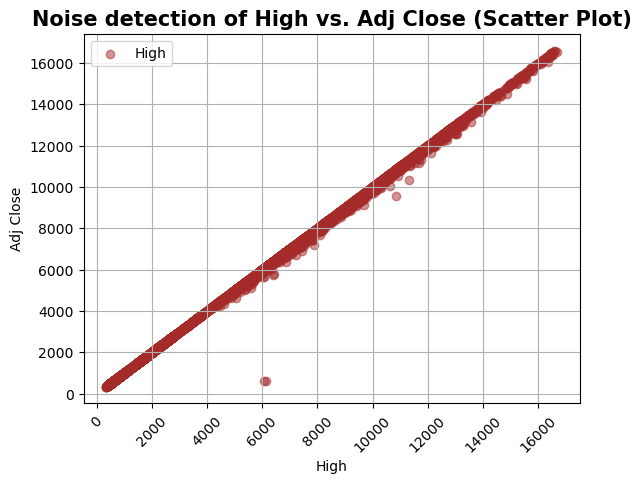

In [42]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df5, x='High', y='Adj Close')
plt.scatter(df5['High'], df5['Adj Close'], c='brown', alpha=0.5)

plt.legend(['High'], loc = 'best')
plt.title('Noise detection of High vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('High', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/High_Adj_noisy.png")

plt.show()

In [43]:
# implementing the address to find out the noise index => result: The index are 829 & 833
Noise_down_2 = df5[ (df5["Adj Close"]<2000) & (df5["High"]>5000) ]
Noise_down_2

,Index,Date,Open,High,Low,Close,Adj Close
829,NYA,5/27/1969,612.0,6124.0,612.0,612.0,612.0
833,NYA,6/3/1969,607.0,6066.0,607.0,607.0,607.0


Now is the time to remove these two achieved indexes! Using .drop()<br>
INDEXES are 829 & 833

In [44]:
df6 = df5.drop(index = [829, 833])
df6

,Index,Date,Open,High,Low,Close,Adj Close
0,NYA,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,NYA,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,NYA,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,NYA,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,NYA,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,NYA,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,NYA,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,NYA,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


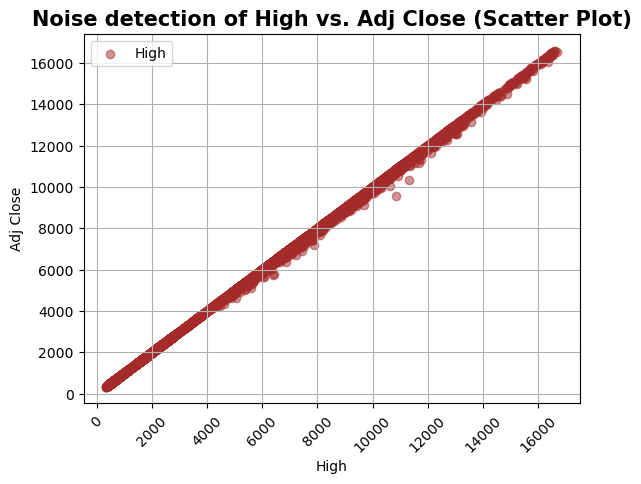

In [45]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df6, x='High', y='Adj Close')
plt.scatter(df6['High'], df6['Adj Close'], c='brown', alpha=0.5)

plt.legend(['High'], loc = 'best')
plt.title('Noise detection of High vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('High', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/High_Adj_clean.png")

plt.show()

So the last DataFrame name is df6 which has no noises in "High" and "Adj Close". <br>
Let's go for the next feature, check on "Low" and "Adj Close":

### 8-3) Noise detection and removal of (( "Low" (Feature, x5) *vs.* "Adj Close" (Target, y) ))

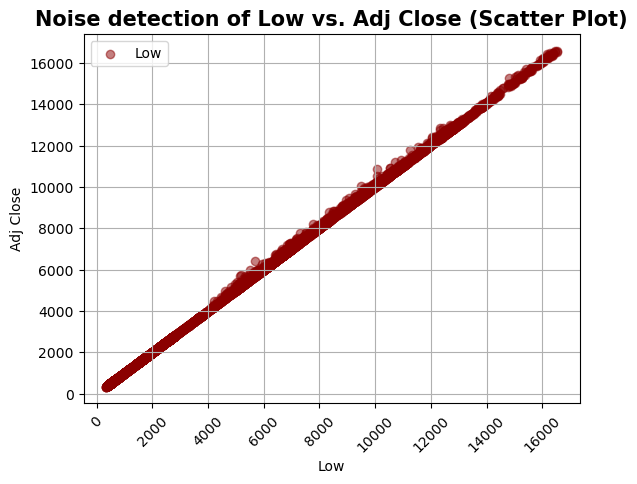

In [46]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df6, x='Low', y='Adj Close')
plt.scatter(df6['Low'], df6['Adj Close'], c='darkred', alpha=0.5)

plt.legend(['Low'], loc = 'best')
plt.title('Noise detection of Low vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Low', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Low_Adj_not_noisy.png")

plt.show()

So the last DataFrame name is df6 which has no noises in "Low" and "Adj Close". <br>
Let's go for the next feature, check on "Close" and "Adj Close":

### 8-4) Noise detection and removal of (( "Close" (Feature, x6) *vs.* "Adj Close" (Target, y) ))

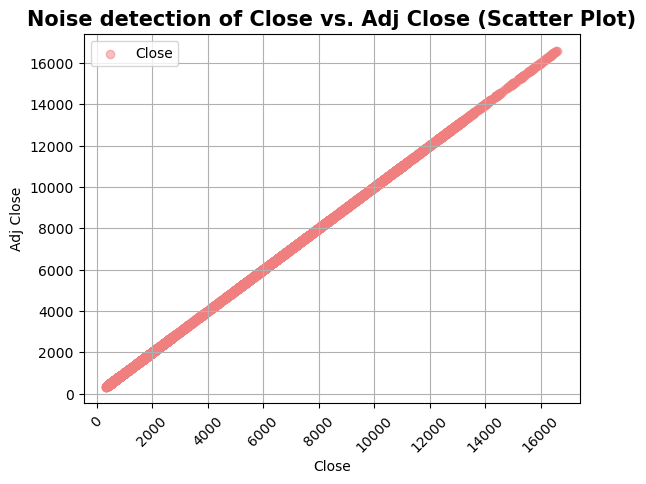

In [47]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df6, x='Close', y='Adj Close')
plt.scatter(df6['Close'], df6['Adj Close'], c='lightcoral', alpha=0.5)

plt.legend(['Close'], loc = 'best')
plt.title('Noise detection of Close vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Close', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=45)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Close_Adj_not_noisy.png")

plt.show()

So the last DataFrame name is df6 which has no noises in "Close" and "Adj Close". <br>
Let's go for the next two features, check on "Index" and "Adj Close":

### 8-5) Noise detection and removal of (( "Index" (Feature, x1) *vs.* "Adj Close" (Target, y) ))

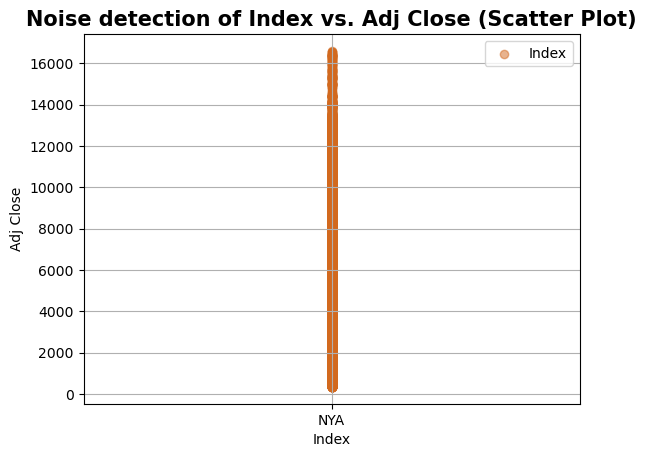

In [48]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df6, x='Index', y='Adj Close')
plt.scatter(df6['Index'], df6['Adj Close'], c='chocolate', alpha=0.5)

plt.legend(['Index'], loc = 'best')
plt.title('Noise detection of Index vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Index', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(rotation=0)
plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Index_Adj_not_noisy.png")

plt.show()

So the last DataFrame name is df6 which has no noises in "Index" and "Adj Close". <br>
Let's go for the last feature, check on "Date" and "Adj Close":

### 8-6) Noise detection and removal of (( "Date" (Feature, x2) *vs.* "Adj Close" (Target, y) ))

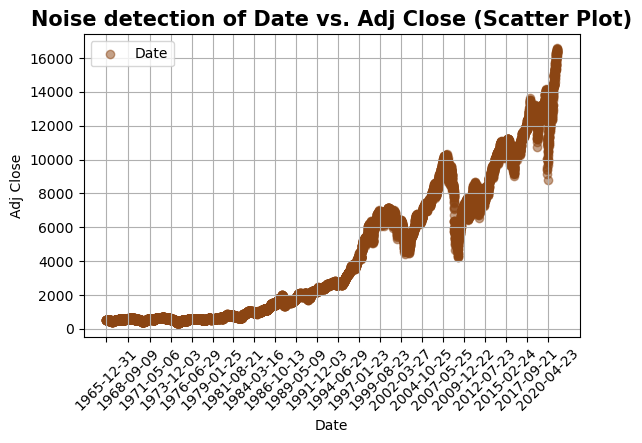

In [63]:
# plotting the "Scatter Plot" before Noise removing

#sns.scatterplot(data=df6, x='Date', y='Adj Close')
plt.scatter(df6['Date'], df6['Adj Close'], c='saddlebrown', alpha=0.5)

plt.legend(['Date'], loc = 'best')
plt.title('Noise detection of Date vs. Adj Close (Scatter Plot)', fontsize=15, fontweight='bold')

plt.xlabel('Date', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)

plt.grid()

plt.xticks(df6["Date"][::650],  rotation=45)
plt.gcf().subplots_adjust(bottom=0.25)

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Scatter plots/Date_Adj_not_noisy.png")

plt.show()

## 9) Plot linearly plot between "Date" vs. "Adj Close"

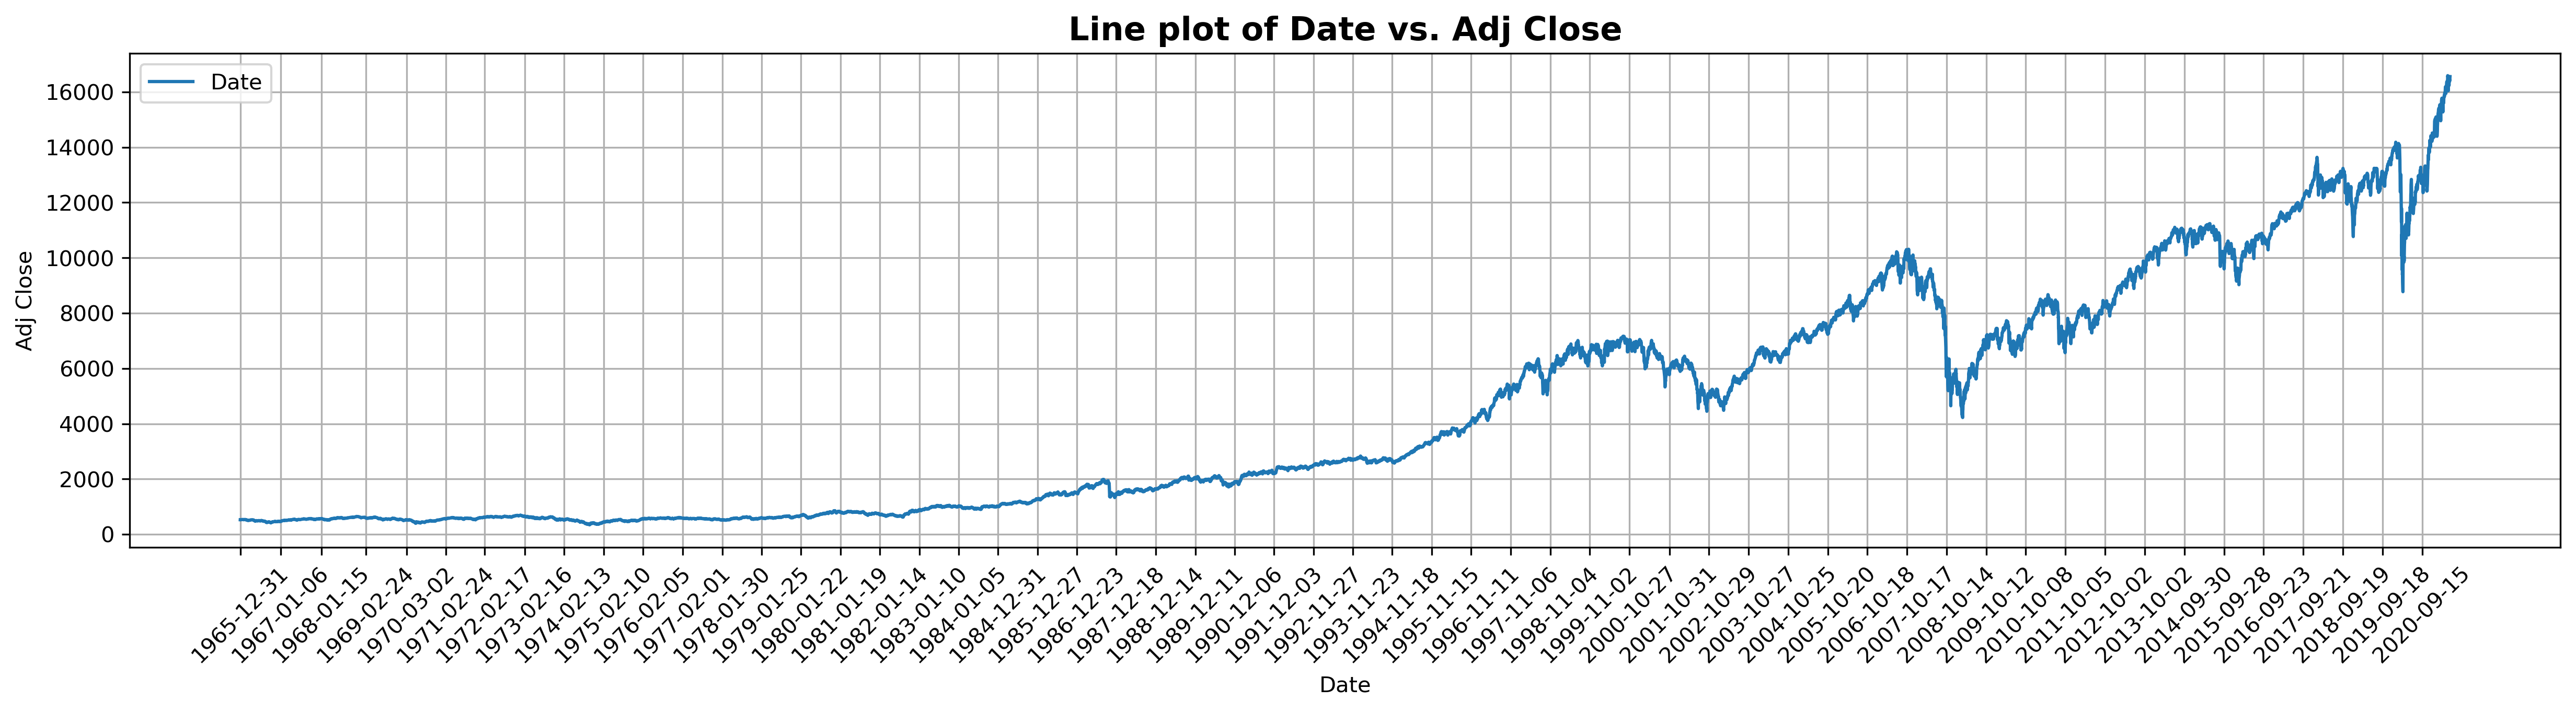

In [65]:
# plotting the "Line Plot"

plt.figure(figsize=(20, 5), dpi=300)

#sns.lineplot(data=df6, x='Date', y='Adj Close')
plt.plot(df6["Date"], df6["Adj Close"])

plt.legend(['Date'], loc = 'best')
plt.title('Line plot of Date vs. Adj Close', fontsize=15, fontweight='bold')

plt.xlabel('Date', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)

plt.xticks(df6["Date"][::250],  rotation=45)
plt.gcf().subplots_adjust(bottom=0.25)

plt.grid()

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Date_Adj_line.png")

plt.show()

## 10) Count plot by Seaborn

pandas.to_datetime() for time serie column is:

In [51]:
df6["Date"] = pd.to_datetime(df6["Date"])
df6["Date"]

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13928, dtype: datetime64[ns]

Now we want to use *Pandas* library to plot and analyze our first column which is a column with time series feature.<br>
We enter the column on which we want this analysis to take place.
Because we must first introduce the desired column to Python.<br>
We give this command a date format and here it is about the annual review.<br>
Of course, it can also be changed to a monthly review.

In [52]:
Year = pd.to_datetime(df6["Date"]).dt.year

Now is the time to run this command in Seaborn plotting:

In [53]:
import seaborn as sns

In this plot we only define the "X" axis, and no "Y".<br>
But why?<br>
Because this plot says:<br>
When you use this command, it counts the "y" by itselfs.<br>
It comes and counts y for us so there is no "y" needed.

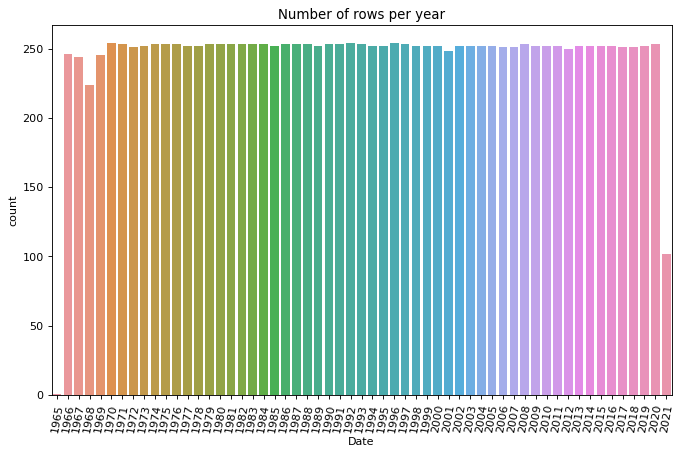

In [54]:
plt.figure(figsize=(10, 6), dpi=80)

plt.title('Number of rows per year')
plt.xticks(rotation=80)

sns.countplot(x=Year)

#plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Date_countplot.png")

plt.show()

## 11) Pair plot by Seaborn

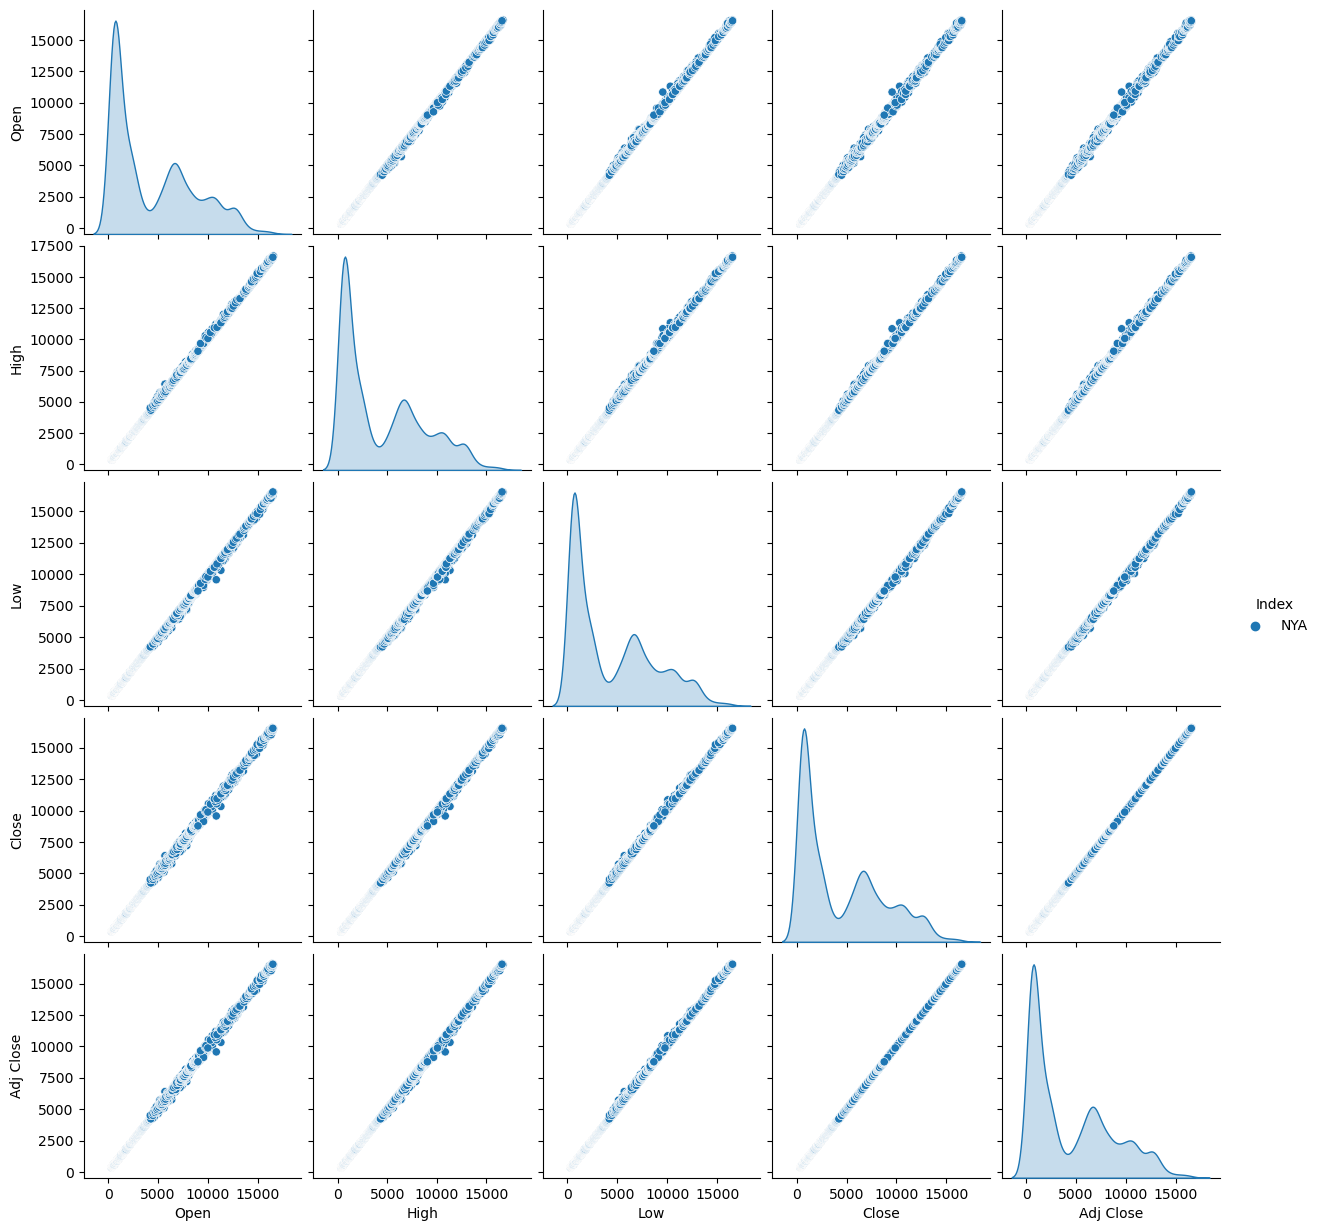

In [55]:
sns.pairplot(df6, hue="Index")
plt.savefig ("D:/IMT/3- Data Science/9- Project #2/plt.savefig/Index_pairplot.png")
plt.show()